# Explore here

In [2]:
# Your code here
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
duplicados = df[df.duplicated()]

duplicados

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
variables = (list(df))

variables

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [9]:
# Objetivo es predecir en base a medidas diagnósticas si un paciente tiene o no diabetes.
# Variable Objetivo = Outcome

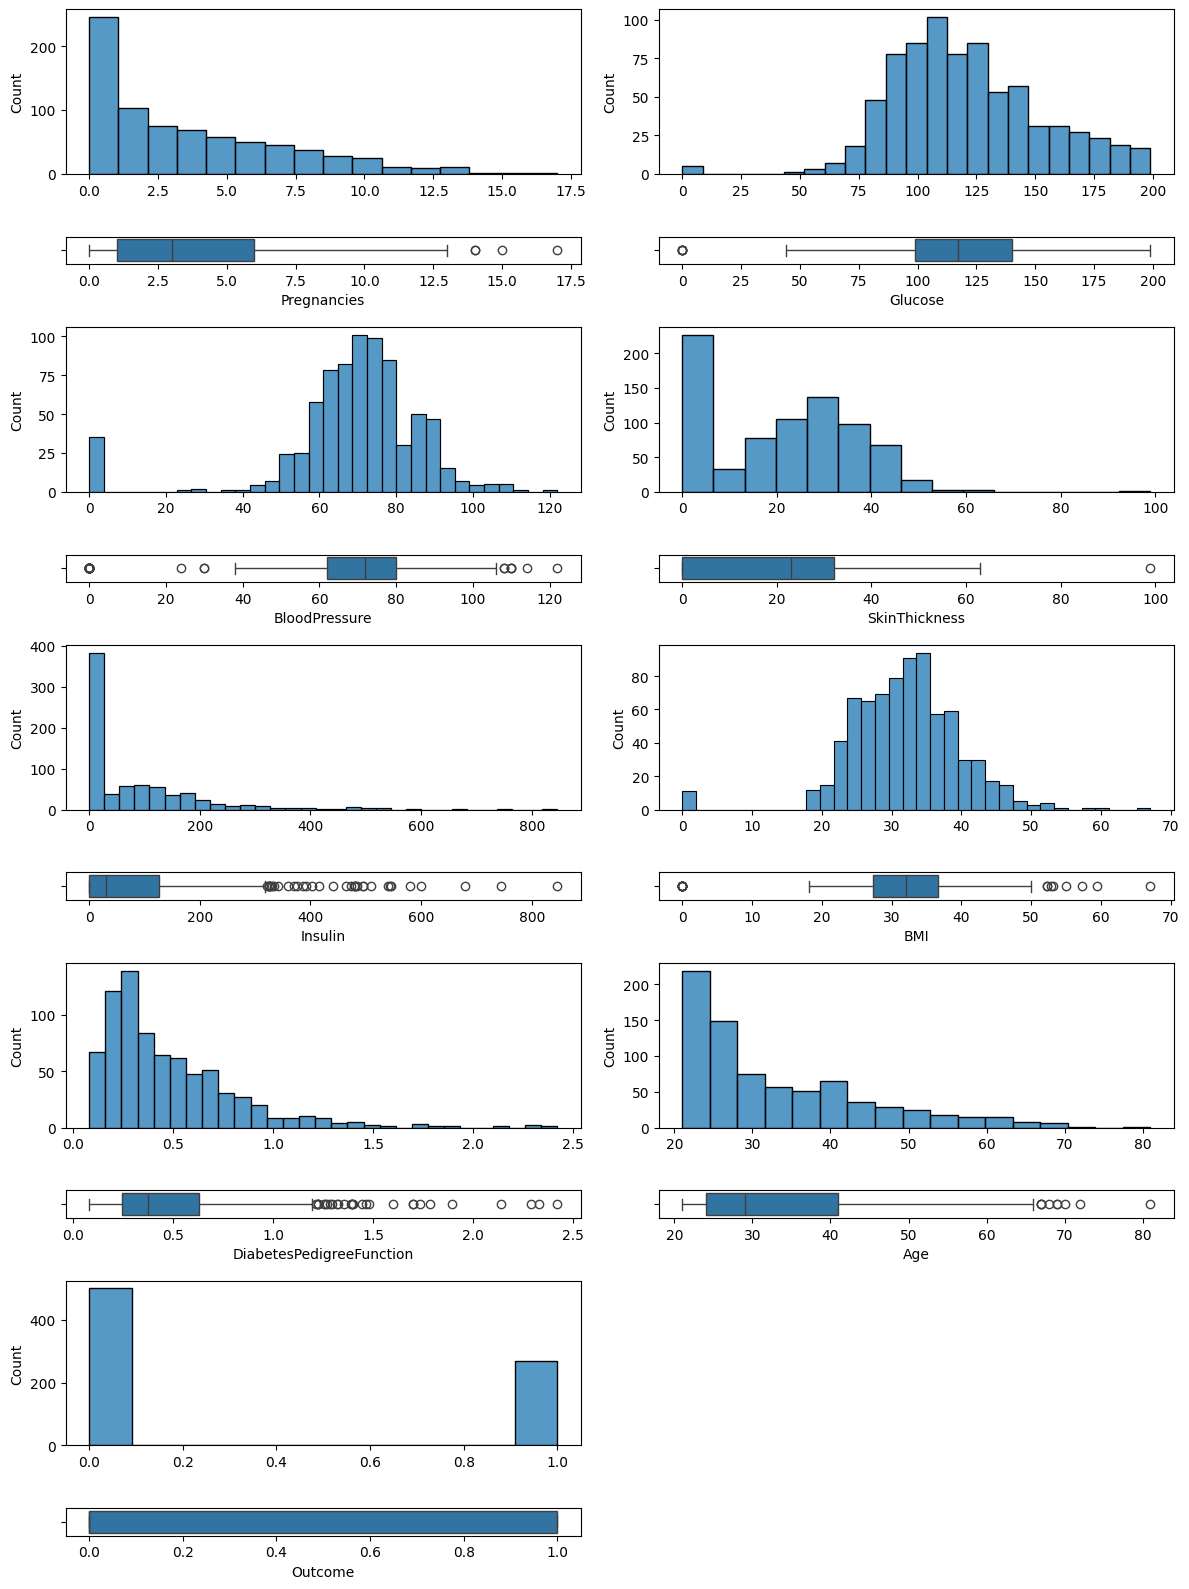

In [10]:
# Hay solo variables númericas. No categoricas
# Analisis univariante númerico

import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(10,2, figsize = (12,16), gridspec_kw = {'height_ratios': [6, 1, 6, 1, 6, 1, 6, 1,6,1]})

sns.histplot(ax = axis[0,0], data = df, x = "Pregnancies").set(xlabel = None)
sns.boxplot(ax = axis[1,0],data = df, x = "Pregnancies")

sns.histplot(ax = axis[0,1], data = df, x = "Glucose").set(xlabel = None)
sns.boxplot(ax = axis[1,1],data = df, x = "Glucose")

sns.histplot(ax = axis[2,0], data = df, x = "BloodPressure").set(xlabel = None)
sns.boxplot(ax = axis[3,0],data = df, x = "BloodPressure")

sns.histplot(ax = axis[2,1], data = df, x = "SkinThickness").set(xlabel = None)
sns.boxplot(ax = axis[3,1],data = df, x = "SkinThickness")

sns.histplot(ax = axis[4,0], data = df, x = "Insulin").set(xlabel = None)
sns.boxplot(ax = axis[5,0],data = df, x = "Insulin")

sns.histplot(ax = axis[4,1], data = df, x = "BMI").set(xlabel = None)
sns.boxplot(ax = axis[5,1],data = df, x = "BMI")

sns.histplot(ax = axis[6,0], data = df, x = "DiabetesPedigreeFunction").set(xlabel = None)
sns.boxplot(ax = axis[7,0],data = df, x = "DiabetesPedigreeFunction")

sns.histplot(ax = axis[6,1], data = df, x = "Age").set(xlabel = None)
sns.boxplot(ax = axis[7,1],data = df, x = "Age")

sns.histplot(ax = axis[8,0], data = df, x = "Outcome").set(xlabel = None)
sns.boxplot(ax = axis[9,0],data = df, x = "Outcome")

fig.delaxes(axis[8, 1])
fig.delaxes(axis[9, 1])

plt.tight_layout()

plt.show()

In [11]:
# La mayoría de las pacientes tiene entre 0 y 2 embarazos
# La glucosa se distribuye principalmente entre 80 y 150 mg/dL, siendo la concentración más común alrededor de los 100 mg/dL
# la presion arterial tiene una distribucion normal, salvo algunos outliers. Media al rededor de 100
# Grosor del pliegue cutáneo del tríceps. hay que revisar por que hay tantos en 0.
# hay que revisar los datos de las insulina, por que hay tantos en 0


In [12]:
variables = (list(df))

variables

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

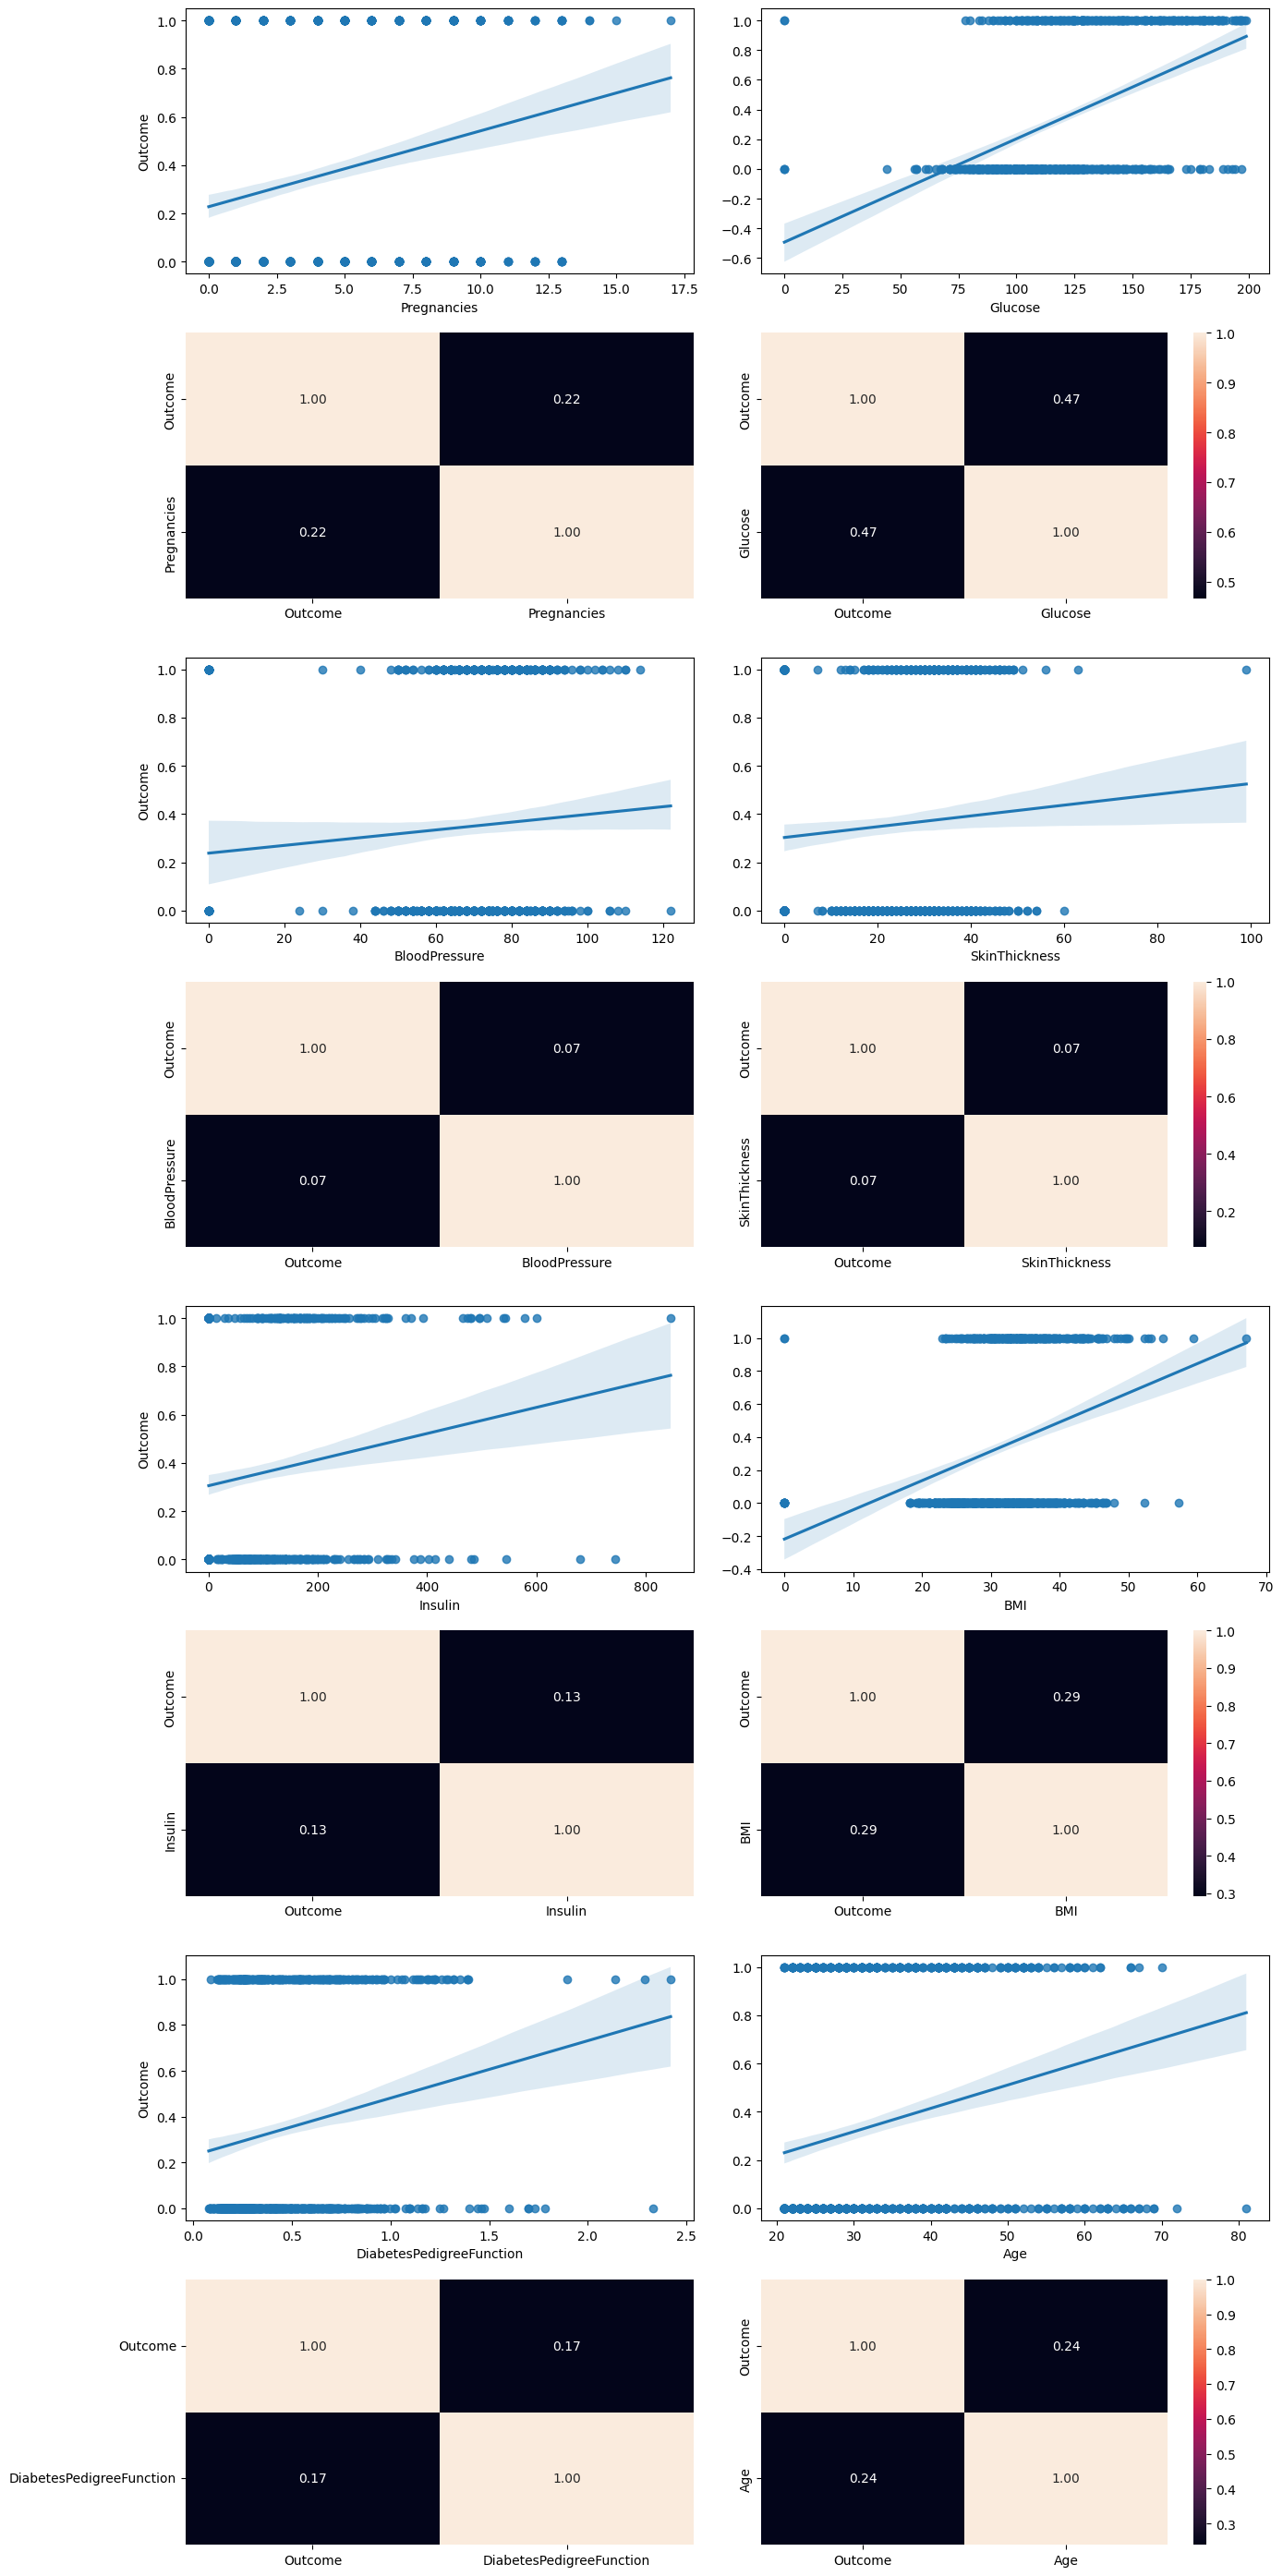

In [13]:
# Analisis numerico-numerico

fig, axis = plt.subplots(8, 2, figsize = (14, 28))

sns.regplot(ax = axis[0, 0], data = df, x = "Pregnancies", y = "Outcome")
sns.heatmap(df[["Outcome", "Pregnancies"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "Glucose", y = "Outcome").set(ylabel=None)
sns.heatmap(df[["Outcome", "Glucose"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = df, x = "BloodPressure", y = "Outcome")
sns.heatmap(df[["Outcome", "BloodPressure"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(ax = axis[2, 1], data = df, x = "SkinThickness", y = "Outcome").set(ylabel=None)
sns.heatmap(df[["Outcome", "SkinThickness"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])

sns.regplot(ax = axis[4, 0], data = df, x = "Insulin", y = "Outcome")
sns.heatmap(df[["Outcome", "Insulin"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 0], cbar = False)

sns.regplot(ax = axis[4, 1], data = df, x = "BMI", y = "Outcome").set(ylabel=None)
sns.heatmap(df[["Outcome", "BMI"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 1])

sns.regplot(ax = axis[6, 0], data = df, x = "DiabetesPedigreeFunction", y = "Outcome")
sns.heatmap(df[["Outcome", "DiabetesPedigreeFunction"]].corr(), annot = True, fmt = ".2f", ax = axis[7, 0], cbar = False)

sns.regplot(ax = axis[6, 1], data = df, x = "Age", y = "Outcome").set(ylabel=None)
sns.heatmap(df[["Outcome", "Age"]].corr(), annot = True, fmt = ".2f", ax = axis[7, 1])

plt.tight_layout()

plt.show()

In [14]:
# Las variables con mayor correlación son Glucosa y BMI, lo que sugiere que los niveles de glucosa y el índice de masa corporal son buenos predictores.
# Presión Arterial, Grosor de la Piel y Insulina tienen correlaciones muy bajas, lo que indica que no tienen una fuerte relación con el Outcome.
# La Edad y el Número de Embarazos también tienen alguna influencia, pero no tan fuerte como la Glucosa y el BMI.

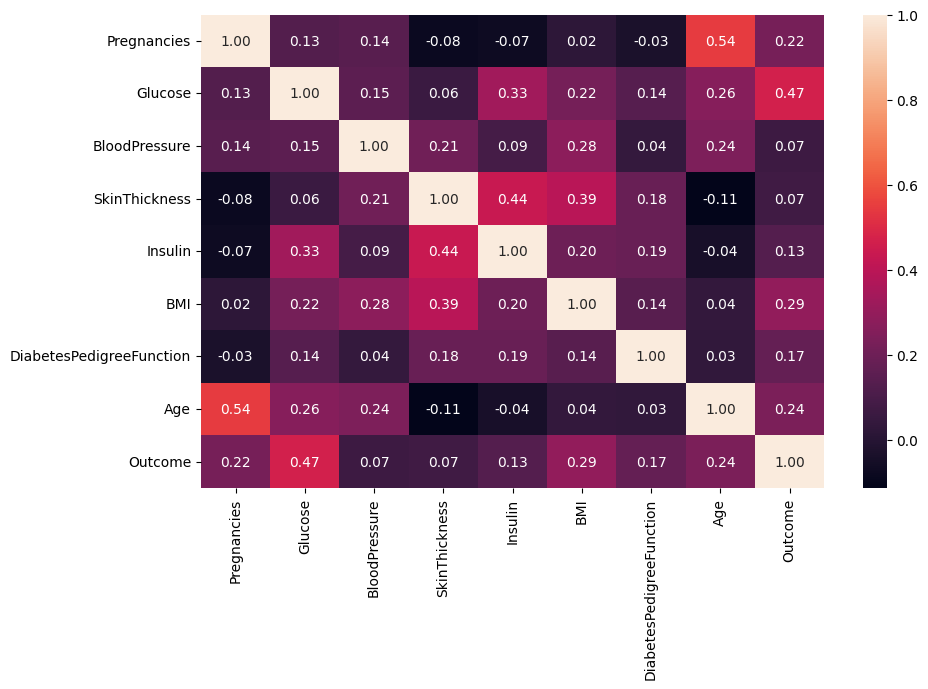

In [15]:
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [16]:
df.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64